# Perceptron

#### Importing packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import random
from matplotlib import animation
% matplotlib nbagg

#### Reading CSV Files

In [3]:
data1 = pd.read_csv('datafile1.csv', names = ['X1', 'X2', 'Y'])
data2 = pd.read_csv('datafile2.csv', names = ['X1', 'X2', 'Y'])
data3 = pd.read_csv('datafile3.csv', names = ['X1', 'X2', 'Y'])
data4 = pd.read_csv('datafile4.csv', names = ['X1', 'X2', 'Y'])

## Dataset 1

In [35]:
data1.head()

,X1,X2,Y
0,0.474341,-1.164631,0
1,1.683638,-1.782302,0
2,1.589368,0.049690,1
3,-1.026358,-0.320719,0
4,0.860988,-0.168258,0


#### Scatter Plot of X1 vs X2

<IPython.core.display.Javascript object>


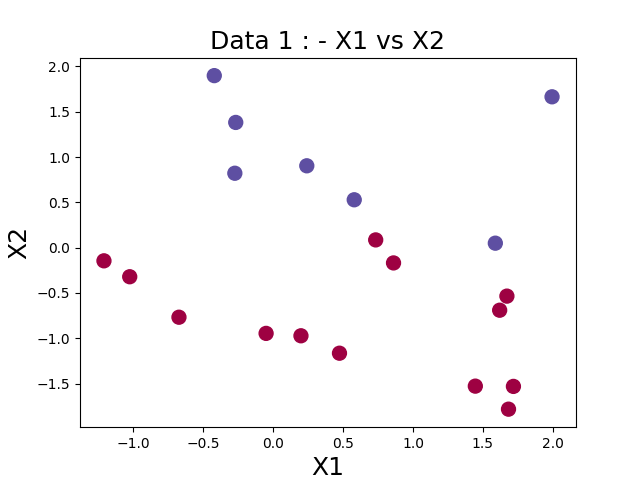

In [36]:
plt.scatter(data1.X1, data1.X2, c = data1.Y , s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 1 : - X1 vs X2', fontsize = 18)
plt.show()

Values having Y = 0 are represented by RED colour and values having Y = 1 are represented by BLUE colour. In this figure it is evident that it can be separated by a line.

#### Setting inital values of weights(w1,w2) and bias(-threshold) using numpy random

In [78]:
X = []
Y = []

for row in data1.iterrows():
    X.append(np.array([row[1][0], row[1][1], 1]))
    Y.append(np.array(row[1][2]))

In [79]:
weights = []

weights.append(np.array([np.random.random_sample(), np.random.random_sample(), -np.random.random_sample()]).reshape(3,1))
print("INITIAL VALUES: W1 =", weights[0][0], "| W2 = ", weights[0][1],"| Bias =" , weights[0][2])

INITIAL VALUES: W1 = [ 0.8579303] | W2 =  [ 0.73239137] | Bias = [-0.485578]


#### Iterations for 20 Epocs

In [80]:
count = 0
epoc = 1
weights_plot = []
LR = 0.1

while epoc <= 20:

    total_error = 0
    for i in range(len(X)):
        Y_Actual = Y[i]
        # Predicting Values --
        Activation_value = X[i].dot(weights[0])
        if Activation_value >= 0:
            Y_Predicted = 1
        else:
            Y_Predicted = 0
        # Calculating error --
        error = Y_Actual - Y_Predicted
        total_error += error**2
        # Updating Values --
        for j in range(len(weights[0])):
            weights[0][j] = weights[0][j] + error*X[i][j]*LR
    
    # Weights Matrix for Animation Plot per EPOC
    weights_plot.append(np.array([weights[0][0], weights[0][1], weights[0][2]]).reshape(3,1))
    
    print("Epoc: ", epoc, " -> Total Error = ", total_error)
    
    if total_error == 0:
        print("\nModel is Linearly Seperable!")
        w1, w2, bias =  weights[0][0], weights[0][1], weights[0][2]
        print("W1 =", w1, "| W2 = ", w2, "| Bias = ", bias, "---> Found at EPOC:", epoc)
        break
   
    epoc += 1  
    
if total_error != 0:
    print("\nThis model is not linearly separable!")

Epoc:  1  -> Total Error =  3.0
Epoc:  2  -> Total Error =  1.0
Epoc:  3  -> Total Error =  1.0
Epoc:  4  -> Total Error =  0.0

Model is Linearly Seperable!
W1 = [ 0.48158076] | W2 =  [ 0.97396306] | Bias =  [-0.585578] ---> Found at EPOC: 4


#### Plot of Scatter-Line: WITHOUT ANIMATION

<IPython.core.display.Javascript object>


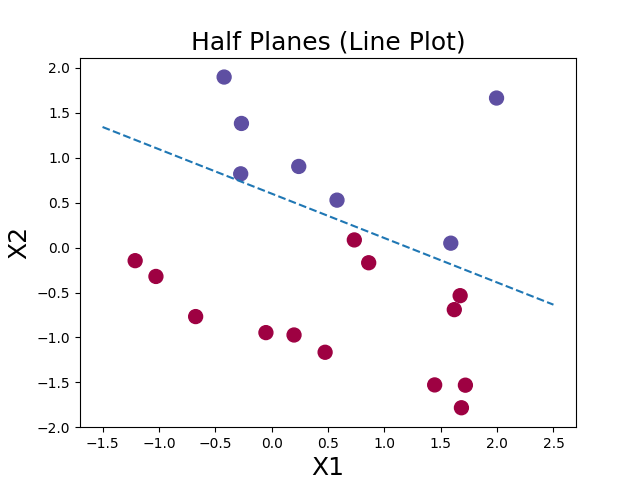

In [81]:
## Line Plot
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 1 : - X1 vs X2', fontsize = 18)
plt.show()
x = np.arange(-1.5, 3)
y = -x*(w1/w2) - bias/w2
## fit with np.polyfit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '--')

# Scatter Plot
plt.scatter(data1.X1, data1.X2, c = data1.Y , s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Half Planes (Line Plot)', fontsize = 18)
plt.show()

#### Plots - With Animation

<IPython.core.display.Javascript object>


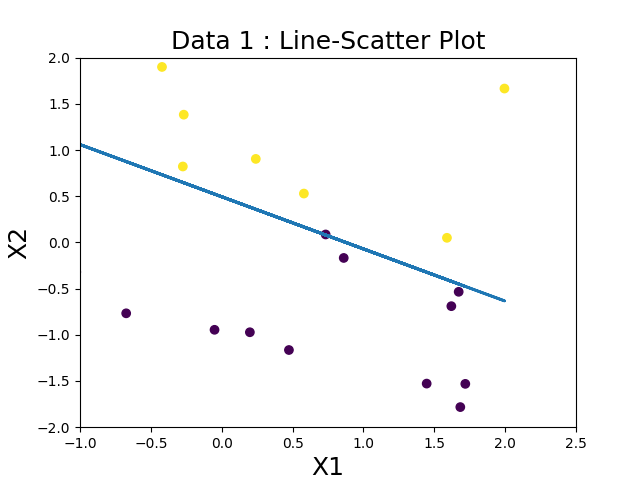

In [82]:
# ANIMATION - First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-1, 2.5), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

ax.scatter(data1.X1, data1.X2, c = data1.Y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = data1.X1
    y = -x*(weights_plot[i][0]/weights_plot[i][1]) - weights_plot[i][2]/weights_plot[i][1]
    line.set_data(x, y)
    return line

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func = init, frames = len(weights_plot), interval=20, blit=True)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 1 : Line-Scatter Plot', fontsize = 18)
plt.show()

This Model is linearly Separable

.

## Dataset 2

<IPython.core.display.Javascript object>


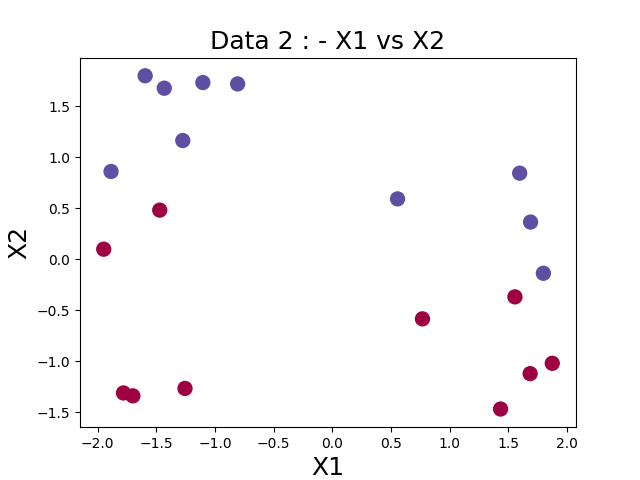

In [450]:
plt.scatter(data2.X1, data2.X2, c = data2.Y, s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 2 : - X1 vs X2', fontsize = 18)
plt.show()

In [61]:
X = []
Y = []

for row in data2.iterrows():
    X.append(np.array([row[1][0], row[1][1], 1]))
    Y.append(np.array(row[1][2]))

In [62]:
weights = []

weights.append(np.array([np.random.random_sample(), np.random.random_sample(), -np.random.random_sample()]).reshape(3,1))
print("INITIAL VALUES: W1 =", weights[0][0], "| W2 = ", weights[0][1],"| Bias =" , weights[0][2])

INITIAL VALUES: W1 = [ 0.9495184] | W2 =  [ 0.36617255] | Bias = [-0.3739119]


#### Iterations for 20 Epocs

In [63]:
count = 0
epoc = 1
weights_plot = []

while epoc <= 20:

    total_error = 0
    for i in range(len(X)):
        Y_Actual = Y[i]
        # Predicting Values --
        Activation_value = X[i].dot(weights[0])
        if Activation_value >= 0:
            Y_Predicted = 1
        else:
            Y_Predicted = 0
        # Calculating error --
        error = Y_Actual - Y_Predicted
        total_error += error**2
        # Updating Values --
        for j in range(len(weights[0])):
            weights[0][j] = weights[0][j] + error*X[i][j]
            
    
    weights_plot.append(np.array([weights[0][0], weights[0][1], weights[0][2]]).reshape(3,1))
    print("Epoc: ", epoc, " -> Total Error = ", total_error)
    
    if total_error == 0:
        print("\nModel is Linearly Seperable!")
        w1, w2, bias =  weights[0][0], weights[0][1], weights[0][2]
        print("W1 =", w1, "| W2 = ", w2, "| Bias = ", bias, "---> Found at EPOC:", epoc)
        break
    
    epoc += 1  
    
if total_error != 0:
    print("\nThis model is not linearly separable!")

Epoc:  1  -> Total Error =  4.0
Epoc:  2  -> Total Error =  2.0
Epoc:  3  -> Total Error =  2.0
Epoc:  4  -> Total Error =  4.0
Epoc:  5  -> Total Error =  2.0
Epoc:  6  -> Total Error =  4.0
Epoc:  7  -> Total Error =  4.0
Epoc:  8  -> Total Error =  2.0
Epoc:  9  -> Total Error =  4.0
Epoc:  10  -> Total Error =  2.0
Epoc:  11  -> Total Error =  2.0
Epoc:  12  -> Total Error =  2.0
Epoc:  13  -> Total Error =  0.0

Model is Linearly Seperable!
W1 = [ 2.02097207] | W2 =  [ 7.41536462] | Bias =  [-2.3739119] ---> Found at EPOC: 13


#### PLOT

<IPython.core.display.Javascript object>


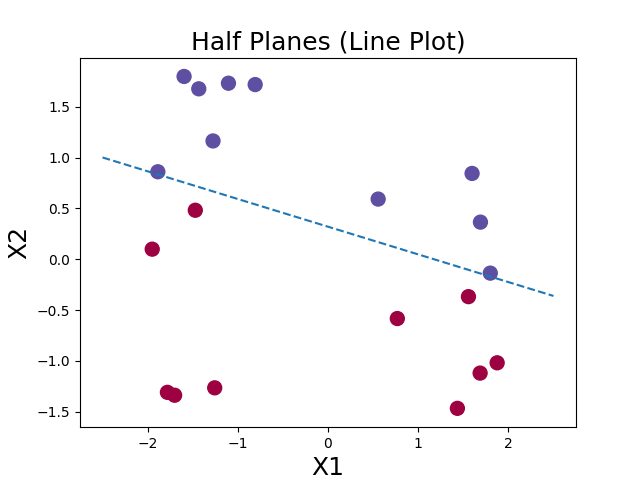

In [64]:
## Line Plot
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
x = np.arange(-2.5, 3.5)
y = -x*(w1/w2) - bias/w2
## fit with np.polyfit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '--')

# Scatter Plot
plt.scatter(data2.X1, data2.X2, c = data2.Y , s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Half Planes (Line Plot)', fontsize = 18)
plt.show()

<IPython.core.display.Javascript object>


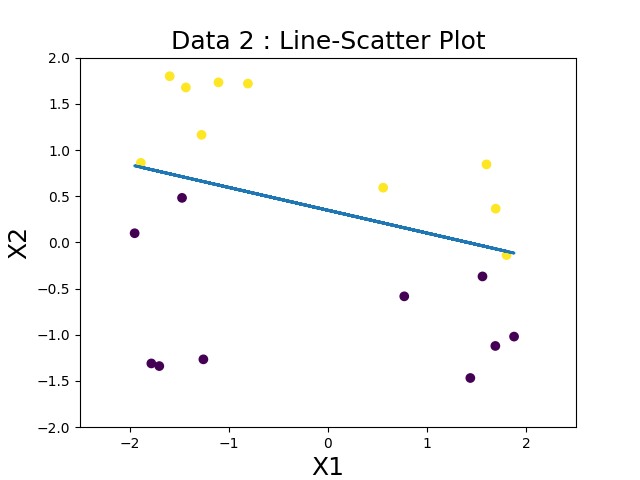

In [470]:
# ANIMATION - First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-2.5, 2.5), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

ax.scatter(data2.X1, data2.X2, c = data2.Y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = data2.X1
    y = -x*(weights_plot[i][0]/weights_plot[i][1]) - weights_plot[i][2]/weights_plot[i][1]
    line.set_data(x, y)
    return line

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func = init, frames = len(weights_plot), interval=20, blit=True)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 2 : Line-Scatter Plot', fontsize = 18)
plt.show()

This Model is linearly Separable

.

## Dataset 3

<IPython.core.display.Javascript object>


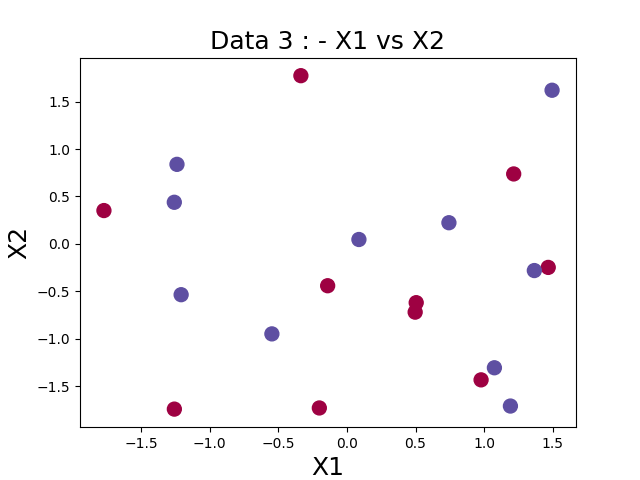

In [82]:
plt.scatter(data3.X1, data3.X2, c = data3.Y, s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 3 : - X1 vs X2', fontsize = 18)
plt.show()

In [66]:
X = []
Y = []

for row in data3.iterrows():
    X.append(np.array([row[1][0], row[1][1], 1]))
    Y.append(np.array(row[1][2]))

In [67]:
weights = []

weights.append(np.array([np.random.random_sample(), np.random.random_sample(), -np.random.random_sample()]).reshape(3,1))
print("INITIAL VALUES: W1 =", weights[0][0], "| W2 = ", weights[0][1],"| Bias =" , weights[0][2])

INITIAL VALUES: W1 = [ 0.75933984] | W2 =  [ 0.0422381] | Bias = [-0.10714793]


#### Iterations for 20 Epocs

In [68]:
count = 0
epoc = 1
weights_plot = []

while epoc <= 20:

    total_error = 0
    for i in range(len(X)):
        Y_Actual = Y[i]
        # Predicting Values --
        Activation_value = X[i].dot(weights[0])
        if Activation_value >= 0:
            Y_Predicted = 1
        else:
            Y_Predicted = 0
        # Calculating error --
        error = Y_Actual - Y_Predicted
        total_error += error**2
        # Updating Values --
        for j in range(len(weights[0])):
            weights[0][j] = weights[0][j] + error*X[i][j]
            
    
    weights_plot.append(np.array([weights[0][0], weights[0][1], weights[0][2]]).reshape(3,1))
    print("Epoc: ", epoc, " -> Total Error = ", total_error)
    
    if total_error == 0:
        print("\nModel is Linearly Seperable!")
        w1, w2, bias =  weights[0][0], weights[0][1], weights[0][2]
        print("W1 =", w1, "| W2 = ", w2, "| Bias = ", bias, "---> Found at EPOC:", epoc)
        break
    
    epoc += 1  
    
if total_error != 0:
    print("\nThis model is not linearly separable!")

Epoc:  1  -> Total Error =  9.0
Epoc:  2  -> Total Error =  11.0
Epoc:  3  -> Total Error =  12.0
Epoc:  4  -> Total Error =  11.0
Epoc:  5  -> Total Error =  13.0
Epoc:  6  -> Total Error =  13.0
Epoc:  7  -> Total Error =  9.0
Epoc:  8  -> Total Error =  12.0
Epoc:  9  -> Total Error =  14.0
Epoc:  10  -> Total Error =  13.0
Epoc:  11  -> Total Error =  14.0
Epoc:  12  -> Total Error =  13.0
Epoc:  13  -> Total Error =  13.0
Epoc:  14  -> Total Error =  14.0
Epoc:  15  -> Total Error =  11.0
Epoc:  16  -> Total Error =  13.0
Epoc:  17  -> Total Error =  13.0
Epoc:  18  -> Total Error =  12.0
Epoc:  19  -> Total Error =  11.0
Epoc:  20  -> Total Error =  13.0

This model is not linearly separable!


#### PLOT

<IPython.core.display.Javascript object>


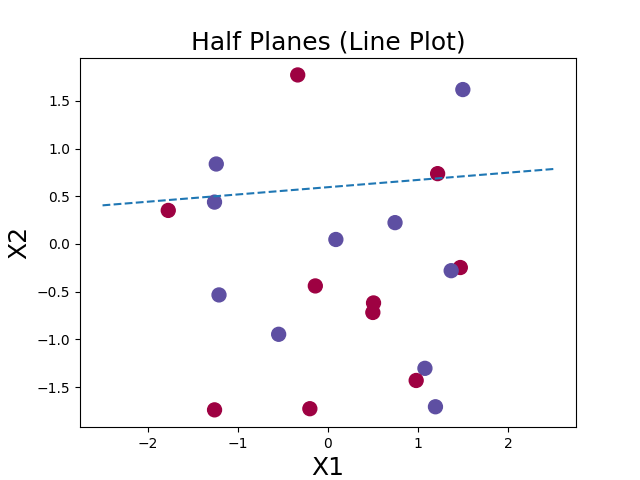

In [479]:
## Line Plot
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
x = np.arange(-2.5, 3.5)
y = -x*(w1/w2) - bias/w2
## fit with np.polyfit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '--')=

# Scatter Plot
plt.scatter(data3.X1, data3.X2, c = data3.Y , s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Half Planes (Line Plot)', fontsize = 18)
plt.show()

#### PLOT ANIMATION 

<IPython.core.display.Javascript object>


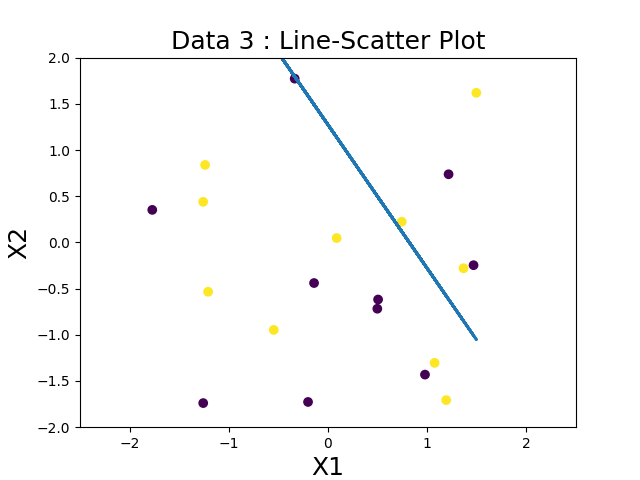

In [480]:
fig = plt.figure()
ax = plt.axes(xlim=(-2.5, 2.5), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

ax.scatter(data3.X1, data3.X2, c = data3.Y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = data3.X1
    y = -x*(weights_plot[i][0]/weights_plot[i][1]) - weights_plot[i][2]/weights_plot[i][1]
    line.set_data(x, y)
    return line

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func = init, frames = len(weights_plot), interval=20, blit=True)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 3 : Line-Scatter Plot', fontsize = 18)
plt.show()

This Model is NOT linearly Separable

.

## Dataset 4

<IPython.core.display.Javascript object>


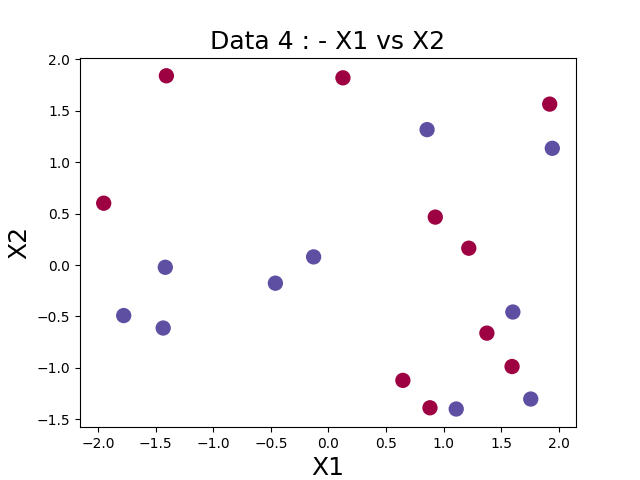

In [500]:
plt.scatter(data4.X1, data4.X2, c = data4.Y, s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 4 : - X1 vs X2', fontsize = 18)
plt.show()

In [69]:
X = []
Y = []

for row in data4.iterrows():
    X.append(np.array([row[1][0], row[1][1], 1]))
    Y.append(np.array(row[1][2]))

In [70]:
weights = []

weights.append(np.array([np.random.random_sample(), np.random.random_sample(), -np.random.random_sample()]).reshape(3,1))
print("INITIAL VALUES: W1 =", weights[0][0], "| W2 = ", weights[0][1],"| Bias =" , weights[0][2])

INITIAL VALUES: W1 = [ 0.86534607] | W2 =  [ 0.60329176] | Bias = [-0.80690242]


#### Iterations for 20 Epocs

In [71]:
count = 0
epoc = 1
weights_plot = []

while epoc <= 20:

    total_error = 0
    for i in range(len(X)):
        Y_Actual = Y[i]
        # Predicting Values --
        Activation_value = X[i].dot(weights[0])
        if Activation_value >= 0:
            Y_Predicted = 1
        else:
            Y_Predicted = 0
        # Calculating error --
        error = Y_Actual - Y_Predicted
        total_error += error**2
        # Updating Values --
        for j in range(len(weights[0])):
            weights[0][j] = weights[0][j] + error*X[i][j]
            
    
    weights_plot.append(np.array([weights[0][0], weights[0][1], weights[0][2]]).reshape(3,1))
    print("Epoc: ", epoc, " -> Total Error = ", total_error)
    
    if total_error == 0:
        print("\nModel is Linearly Seperable!")
        w1, w2, bias =  weights[0][0], weights[0][1], weights[0][2]
        print("W1 =", w1, "| W2 = ", w2, "| Bias = ", bias, "---> Found at EPOC:", epoc)
        break
    
    epoc += 1  
    
if total_error != 0:
    print("\nThis model is not linearly separable!")

Epoc:  1  -> Total Error =  12.0
Epoc:  2  -> Total Error =  9.0
Epoc:  3  -> Total Error =  10.0
Epoc:  4  -> Total Error =  11.0
Epoc:  5  -> Total Error =  9.0
Epoc:  6  -> Total Error =  11.0
Epoc:  7  -> Total Error =  13.0
Epoc:  8  -> Total Error =  9.0
Epoc:  9  -> Total Error =  9.0
Epoc:  10  -> Total Error =  9.0
Epoc:  11  -> Total Error =  9.0
Epoc:  12  -> Total Error =  8.0
Epoc:  13  -> Total Error =  11.0
Epoc:  14  -> Total Error =  12.0
Epoc:  15  -> Total Error =  12.0
Epoc:  16  -> Total Error =  12.0
Epoc:  17  -> Total Error =  12.0
Epoc:  18  -> Total Error =  12.0
Epoc:  19  -> Total Error =  12.0
Epoc:  20  -> Total Error =  12.0

This model is not linearly separable!


#### PLOT - Line Scatter Plot

<IPython.core.display.Javascript object>


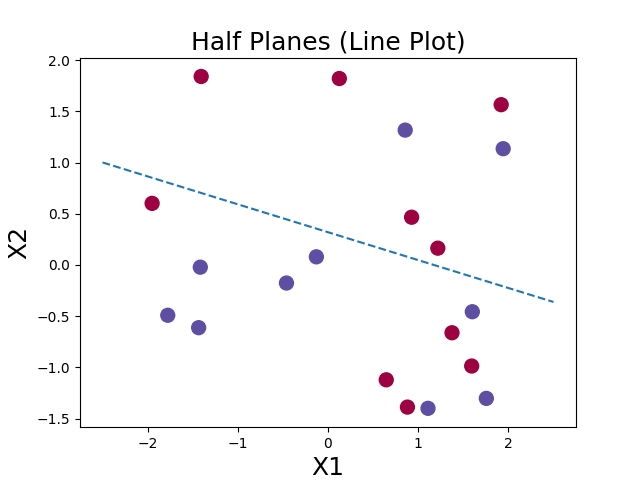

In [74]:
## Line Plot
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
x = np.arange(-2.5, 3.5)
y = -x*(w1/w2) - bias/w2
## fit with np.polyfit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '--')

# Scatter Plot
plt.scatter(data4.X1, data4.X2, c = data4.Y , s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Half Planes (Line Plot)', fontsize = 18)
plt.show()

#### PLOT Line Scatter Animated Plot

<IPython.core.display.Javascript object>


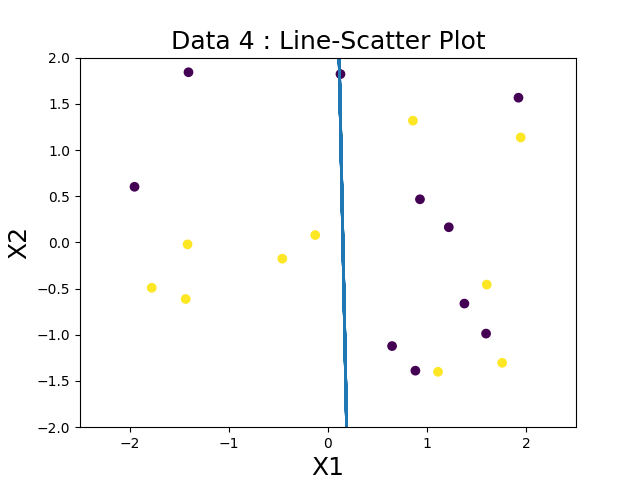

In [76]:
fig = plt.figure()
ax = plt.axes(xlim=(-2.5, 2.5), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

ax.scatter(data4.X1, data4.X2, c = data4.Y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = data4.X1
    y = -x*(weights_plot[i][0]/weights_plot[i][1]) - weights_plot[i][2]/weights_plot[i][1]
    line.set_data(x, y)
    return line

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func = init, frames = len(weights_plot), interval=20, blit=True)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 4 : Line-Scatter Plot', fontsize = 18)
plt.show()

This model is NOT linearly separable